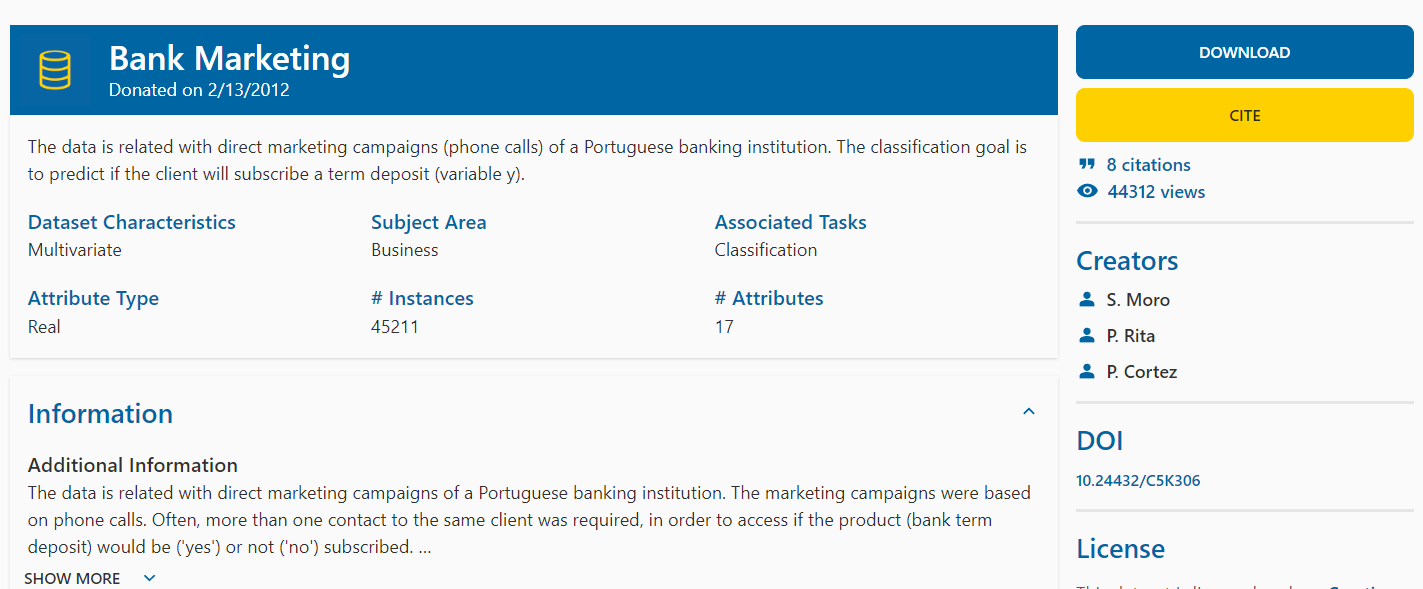

**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

### **Dataset available on:** [UCI Machine Learning Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) , [Kaggle](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)

# **Bank Marketing**

**Additional Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets: <br>
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] <br>
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.<br>
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). <br>
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). <br>
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


#### **Task:**   
   -  The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)
   

### **Imports libraries**

In [ ]:
import pandas as pd # wrangling the data
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.preprocessing import MinMaxScaler # scale the values
from xgboost import XGBClassifier  # the XGBoost the algorithm classifier
from xgboost import plot_importance # plot the most important features
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
from sklearn.model_selection import GridSearchCV # cross validation and parameter tuning
from sklearn.metrics import classification_report # summary report or the metrics


### **Loading the database**

#### **Read the csv file and study the database**

In [ ]:
# read the data using pandas
bank_marketing = pd.read_csv('/content/bank-additional-full-separated.csv')

#### **Basic EDA**

In [ ]:
# display the first five rows using the head function
bank_marketing.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# show the column names
bank_marketing.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# shape of the data
bank_marketing.shape

(41188, 21)

In [ ]:
# check for missing values
bank_marketing.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# check data types
bank_marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# create a copy of the dataset for visualization purpose
bank_marketing_df = bank_marketing.copy()
bank_marketing_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# show the distribution of our target the data
bank_marketing_df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [ ]:
bank_marketing_df['y'] = bank_marketing_df['y'].replace('yes','1')  # replace no with 0

In [ ]:
bank_marketing_df['y'] = bank_marketing_df['y'].replace('no','0') # replace yes with 1

In [ ]:
# print the value count of the new replaced strings
bank_marketing_df['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

### **We can see that 88.73% of the customers did not sign up while 11.26% did.**

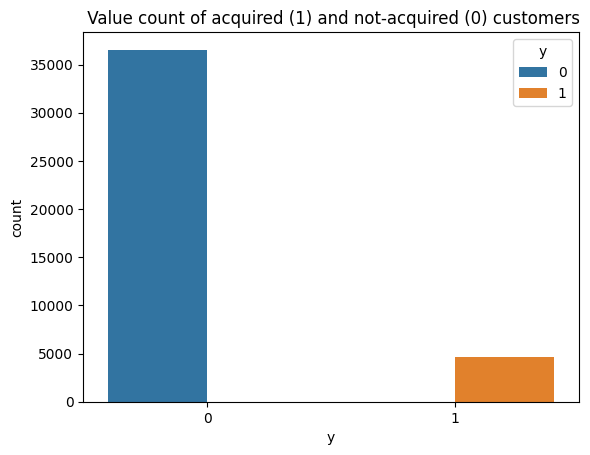

In [ ]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=bank_marketing_df, x='y', hue='y').set(title = " Value count of acquired (1) and not-acquired (0) customers");

## **Preprocessing and feature engineering:**

#### **Define the target and the inputs**

#### **Create a training and a testing dataset**

In [ ]:
# subsetting the inputs
index_list = bank_marketing_df.index # you can use masking to filter out specific index
col_list = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']


# inputs values
inputs = bank_marketing_df.loc[index_list, col_list]

# target value
target = bank_marketing_df['y'].astype(int)

In [ ]:
# this function takes in the dataset encode it and train_split the values Telco_Customer_churn_new
def encode_and_split(inputs,target):

    bank_marketing_dum = pd.get_dummies(inputs, prefix_sep='_', drop_first=True)

    x =  bank_marketing_dum # inputs
    y =  target # value to be predicted


    # train_test split
    x_train, x_test, y_train, y_test = train_test_split(x, # independent or x values
                                                    y, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = y   # get a balance both in the training and test set
                                                      )

    return x_train, x_test, y_train, y_test

In [ ]:
#run encode and split
x_train, x_test, y_train, y_test = encode_and_split(inputs,target)

#### **Check the result from the stratification**

In [ ]:
#get training shape
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (32950, 53)
Training Label Rows 32950


In [ ]:
#get testing shape
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (8238, 53)
Testing Label Rows 8238


In [ ]:
#check class distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.887344
1    0.112656
Name: y, dtype: float64
0    0.887351
1    0.112649
Name: y, dtype: float64


### **Rescaling the data**

**In order for the algorithm to work with the data we need to scale the data**

In [ ]:
scaling = MinMaxScaler().fit(x_train) # scaling the training set
x_train_rescaled = scaling.transform(x_train) # transform the scaled data

### **Get the best estimator of the Xgboost model using gridSearch CV:**

**Estimator:**

In [ ]:
# instantiate the estimator
estimator = XGBClassifier(
    objective= 'binary:logistic',
    random_state=365
    # early_stopping_rounds=10
)

**parameters:**

In [ ]:
# parameters to tune
parameters = {'max_depth': [4,5,6,7,8],
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }

**gridsearch object:**

In [ ]:
# gridsearch object
Xgboost_grid_cv = GridSearchCV(
    estimator=estimator, # xgboostclassifier
    param_grid=parameters, # parameter
    scoring = 'roc_auc',  # roc curve visual representation to show the model's performance
    n_jobs = 10, # number of jobs
    cv = 10, # cross validation 10-folds
    verbose=True # verbose true meaning we want to see the training in real time
)

**GridSearch model:**

In [24]:
%%time
Xgboost_grid_cv.fit(x_train_rescaled, y_train) # fit the model on the x_train_rescaled # eval_set=eval_set,   eval_set = [(X_val, y_val)]

Fitting 10 folds for each of 225 candidates, totalling 2250 fits
CPU times: user 2min 4s, sys: 29.3 s, total: 2min 34s
Wall time: 4h 35min 53s


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=365, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             scoring='roc_auc', verbose=True)

#### **Best estimator of our brute force GridSearch CV:**

In [25]:
# the best params
print(Xgboost_grid_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 75}


**Let us predict the above model using the .predict() method:**

In [26]:
# assign the predicted values to y_preds
y_preds = Xgboost_grid_cv.predict(scaling.transform(x_test)) # predict test transform
# print the predicted values
print(y_preds)

[0 0 0 ... 0 0 0]


### **Visualize the confusion Matrix**

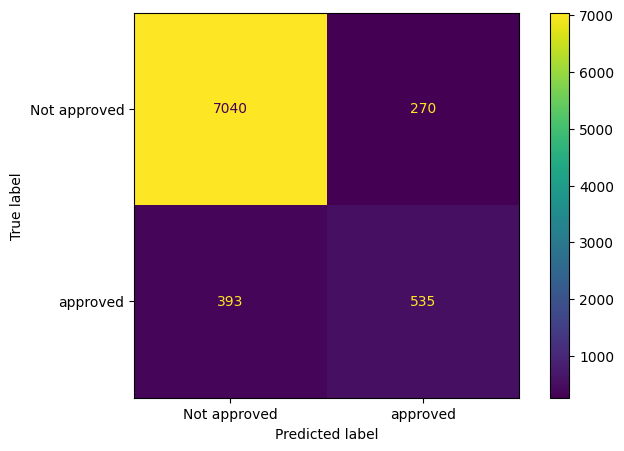

In [27]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_preds),
    display_labels=['Not acquired', "acquired"]
)

cmp.plot(ax=ax);

In [28]:
# print a summary classification_report
print(classification_report(y_test, y_preds, target_names = ['Not acquired', "acquired"]))

              precision    recall  f1-score   support

Not approved       0.95      0.96      0.96      7310
    approved       0.66      0.58      0.62       928

    accuracy                           0.92      8238
   macro avg       0.81      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238



### **Feature importance:**

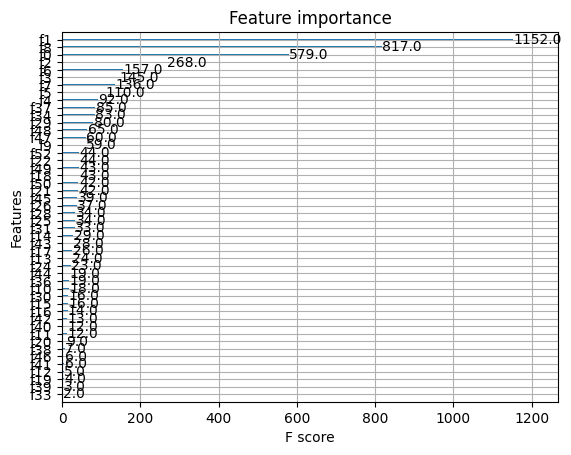

In [29]:
plot_importance(Xgboost_grid_cv.best_estimator_);

### **Save the model:**

In [32]:
# save the model
import pickle

with open('BankMarketing_portugueseCustomers.pickle', 'wb') as to_write:
    pickle.dump(Xgboost_grid_cv, to_write)

In [34]:
# download the file
from google.colab import files
files.download('BankMarketing_portugueseCustomers.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Now over to you:**

*  find a dataset and apply the Xgboost Algorithm
*  find the best parameters using Gridsearch CV
*  And pickle the model

## **GOOD LUCK!**